In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from src.visual_utils import plot_data_bar, plot_data_line, plot_data_line_multiple
from src.stats_utils import calculate_retention, print_basic_stats

In [2]:
files = glob.glob("data/raw/*.csv.gz")


dfs = [pd.read_csv(f, compression="gzip") for f in files]
df = pd.concat(dfs)
df["install_date"] = pd.to_datetime(df["install_date"])
df["event_date"] = pd.to_datetime(df["event_date"])

# Add a new column for later use.
df["days_after_install"] = (df["event_date"] - df["install_date"]).dt.days


In [3]:
# The player who played the game before installing
df[df["days_after_install"] == -1]

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue,days_after_install
208446,7CD8D170771E5753,2024-02-29,android,2024-03-01,NaN,1,158.278,2,1,0,1,0,0.0,0.0,-1


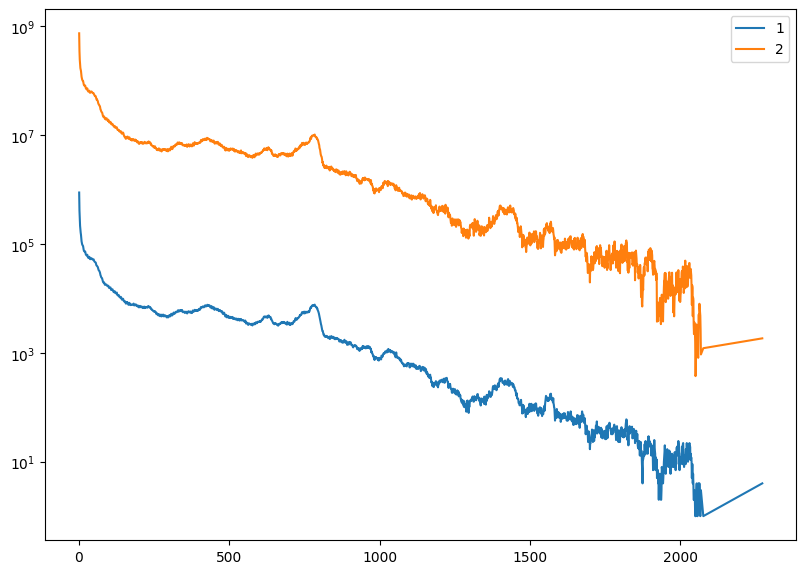

In [5]:
session_duration_df = df.copy()
session_df = session_duration_df.groupby("days_after_install").agg(
    total_session_duration=("total_session_duration", "sum"),
    total_session_count=("total_session_count", "sum")
)
session_df = session_df[session_df.index > 0]

y_values_list = [session_df["total_session_count"], session_df["total_session_duration"]]
plot_data_line_multiple([session_df.index, session_df.index], y_values_list, y_scale="log")